In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

# Import af data

### Gennemsnitlig temperaturafvigelse fra nuværende gennemsnitstemperatur i intervaller af 20 år gennem den holocæne periode

Text(0.5, 1.0, 'Gennemsnitlig temperaturafvigelse gennem den Holocæne periode')

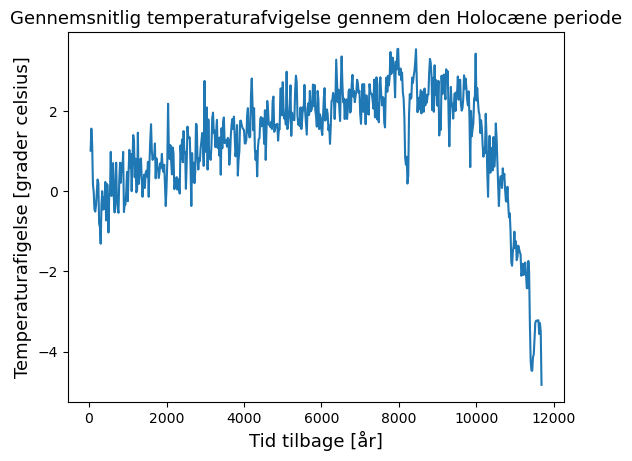

In [2]:
data1 = pd.read_excel('20temperatur.xlsx', header=29, skipfooter = 1)
data1 = data1.to_numpy()

år20_rå = data1[:,0]
temp20_rå = data1[:,1]

plt.plot(år20_rå,temp20_rå)

plt.xlabel('Tid tilbage [år]', fontsize = 13)
plt.ylabel('Temperaturafigelse [grader celsius]', fontsize = 13)
plt.title("Gennemsnitlig temperaturafvigelse gennem den Holocæne periode", fontsize = 13)

## Ilullisat 150 års daglige temperaturmålinger

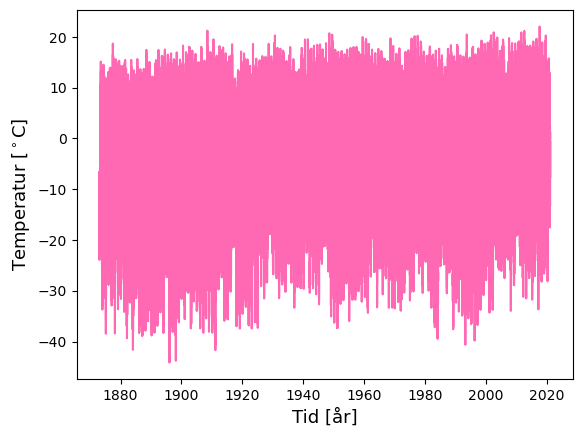

In [3]:
data2 = pd.read_excel('DailyMinMax_Ilullisat_Cor.xlsx', header=1)
data2 = data2.to_numpy()

år_rå = data2[:,0]
temp_rå = data2[:,1]

plt.xlabel('Tid [år]', fontsize = 13)
plt.ylabel(r'Temperatur [$^\circ$C]', fontsize = 13)

plt.plot(år_rå,temp_rå, c = 'hotpink')

## GRACE-data

In [4]:
path = 'greenland_mass_200204_202311.txt'
data = np.genfromtxt(path, delimiter='', skip_header=31)
år_sat, dmasse_sat = data[:,0], data[:,1]

densitet_is = 917 #kg/m^3
dvol_sat, V_sat_err = dmasse_sat*10**12/917, 10**12 * abs(1/densitet_is * data[:,2]) # from mass to volume

## NGRIP

Text(0.5, 1.0, 'Akkumulationsrate over tid NGRIP')

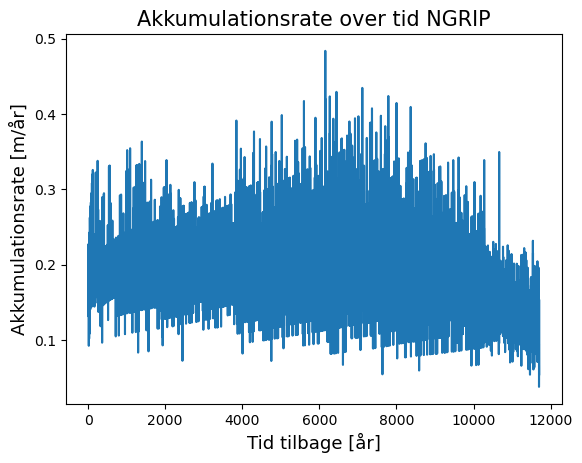

In [34]:
NGRIP = pd.read_excel('NGRIP_acc_Vinther_etal_2009_GICC05_16Sep2010.xlsx', header=58) #gik fra header = 66 #skulle have været header = 58, men for at få str til at passe med GRIP springes ned til år 12 i stedet for at starte med år 4
NGRIP = NGRIP.to_numpy()

NGRIP_age = NGRIP[:,0]
NGRIP_årstal = NGRIP[:,1]
NGRIP_acc_rate = NGRIP [:,6]

plt.plot(NGRIP_age, NGRIP_acc_rate)
plt.xlabel('Tid tilbage [år]', fontsize = 13)
plt.ylabel('Akkumulationsrate [m/år]', fontsize = 13)
plt.title("Akkumulationsrate over tid NGRIP", fontsize = 15)

## GRIP

Text(0.5, 1.0, 'Akkumulationsrate over tid GRIP')

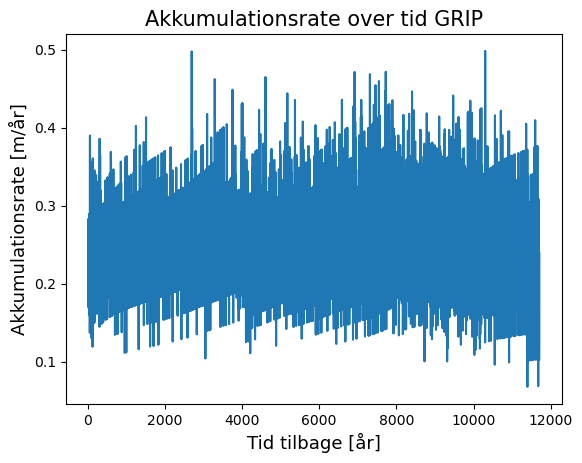

In [33]:
GRIP = pd.read_excel('GRIP_acc_Vinther_etal_2009_GICC05_16Sep2010.xlsx', header=54) #før: header = 55 #før: skipfooter = 3 for både NGRIP og GRIP #jeg indlæser fra 12. år, selvom data går tilbage til 11. år fordi ej data første år for akkumulationsrate. egentlig have jeg header = 54
GRIP = GRIP.to_numpy()

GRIP_age = GRIP[:,0]
GRIP_årstal = GRIP[:,1]
GRIP_acc_rate = GRIP [:,5] #m/år

plt.plot(GRIP_age, GRIP_acc_rate)
plt.xlabel('Tid tilbage [år]', fontsize = 13)
plt.ylabel('Akkumulationsrate [m/år]', fontsize = 13)
plt.title("Akkumulationsrate over tid GRIP", fontsize = 15)

## Interpolation af data

216223.9091999997


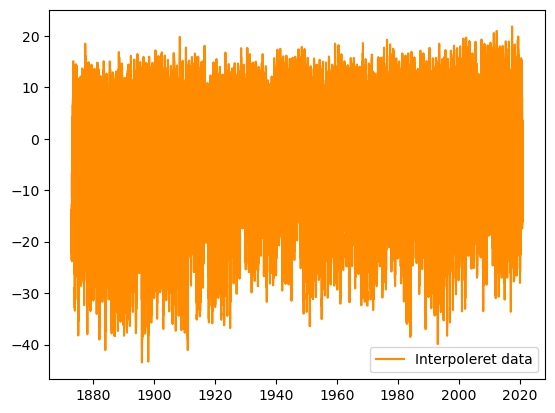

In [7]:
print(4*365.25*(max(år_rå)-min(år_rå)))
year_inter = np.linspace(min(år_rå),max(år_rå),216224) #Jeg prøver at runde op fra 216223.9 til 215224, uden helt at forstå hvilke konsekvenser det kan få - men længderne af de interpolerede arrays er ens nu!
temp_inter = np.interp(year_inter, år_rå, temp_rå)

plt.plot(year_inter,temp_inter, c = 'darkorange', label = 'Interpoleret data')
plt.legend()

In [8]:
print(len(temp_inter), len(year_inter))

216224 216224


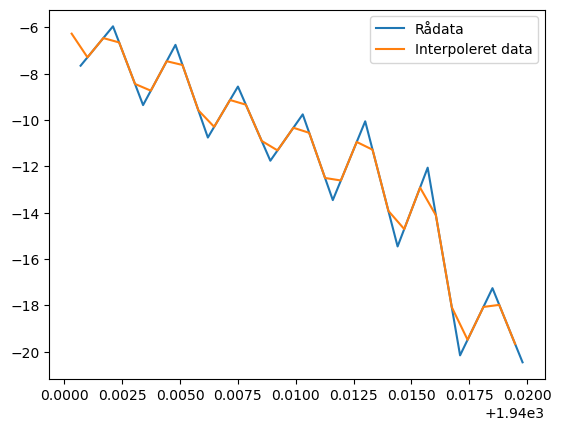

In [9]:
top = 1940.02
bund = 1940
år_rå_X = år_rå[(år_rå >= bund)&(år_rå < top)]
temp_rå_X = temp_rå[(år_rå >= bund)&(år_rå < top)]
år_inter_X = year_inter[(year_inter >= bund)&(year_inter < top)]
temp_inter_X = temp_inter[(year_inter >= bund)&(year_inter < top)]

plt.plot(år_rå_X,temp_rå_X, label = 'Rådata')
plt.plot(år_inter_X, temp_inter_X, label = 'Interpoleret data')
plt.legend()

Med denne metode fås ikke så ekstreme værdier for min/max. Det er ærgerligt.

In [10]:
print((year_inter[1]-year_inter[0])*365.25)

0.2500010512604831


Det er meget tæt på, at hvert tidsskridt varer et kvart døgn.

In [11]:
def interpolation_år():
    interpol_år = []
    år = []
    temp = []
    for i in range(1, len(år_rå)):      # Finder mellempunkter for årsarrayet
        punkt = (år_rå[i] + år_rå[i-1])/2
        interpol_år.append(punkt)

    for i in range(len(interpol_år)):   # Laver liste med både DMI-årstal og mellempunkter
        år.append(år_rå[i])
        år.append(interpol_år[i])
    år.append(år_rå[-1])   # Tilføjer det sidste rå datapunkt manuelt, da der et ét råt datapunkt mere end mellempunkterne.
    return np.array(år)
    
år = interpolation_år()      # Interpolerer temperaturdataen

temp = np.interp(år, år_rå, temp_rå)

In [12]:
print(len(år), len(temp))

216225 216225


In [13]:
print((år-år[0])*365.25)

[0.00000000e+00 2.37412500e-01 4.74825000e-01 ... 5.40555025e+04
 5.40557399e+04 5.40559773e+04]


Jeg er utilfreds med at tidsskridtene ikke er opløst i kvarte døgn, men i en brøkdel, der er lidt mindre. Men nu begynder det at gå op for mig, at det faktisk ikke er relevant for dette datasæt.

### Beskæring af DMI- og GRACE-data

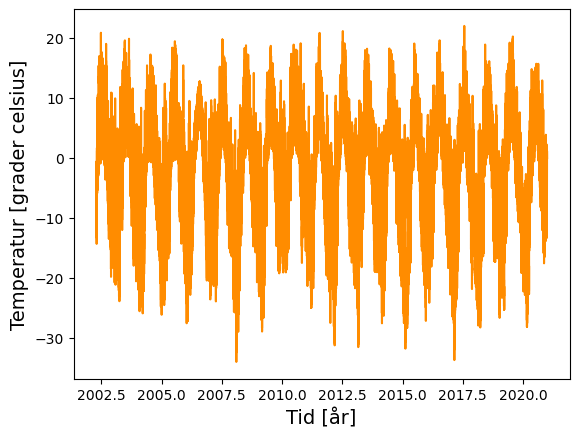

In [14]:
top = max(år_sat)
bund = min(år_sat)
år_cut = år[(år >= bund)&(år < top)]
temp = temp[(år >= bund)&(år < top)]
år = år_cut
plt.plot(år,temp, c = 'darkorange')
plt.xlabel('Tid [år]', fontsize = 14)
plt.ylabel('Temperatur [grader celsius]', fontsize = 14)

# Slicing af GRACE-data
topDMI = max(år)
dmasse_sat = dmasse_sat[år_sat <= topDMI]
dvol_sat = dvol_sat[år_sat <= topDMI]
V_sat_err = V_sat_err[år_sat <= topDMI]
år_sat = år_sat[år_sat <= topDMI]

## Gennemsnitlig akkumulation gennem de sidste 20 år

In [15]:
akk_list = (GRIP_acc_rate[1:21] + NGRIP_acc_rate[1:21])/2   # Tager ikke første punkt med grunden manglende nedbørsdata
akk_gns = np.mean(akk_list)
print('gns akkumulation = ', akk_gns)

gns akkumulation =  0.2034321448890318


## __Tuning af nedbørskonstant__

For at tune nedbørskonstanten, køres simuleringen med $k_{melt}$ og $k_{acc}$ lig 1. Undervejs summeres det samlede volumen nedbør hen over simuleringsperioden. Det bestemmes, hvor meget nedbør der er faldet pr. år, og dette resultat sammenlignes med tabelværdien på $642 \cdot 10^{12}$ kg årligt, og nedbørskonstanten bestemmes som den faktor, der skal ganges på nedbørsvoluminet fra simuleringen for, at få det korrekte årlige nedbør.

In [16]:
V_start = 2.85 * 10**15   # startvolumen af iskappe
V_sat = dvol_sat + V_start - dvol_sat[0]
V = V_start  # startvolumen af iskappe

h = 3 * 10**3       # Starthøjde af iskappe
R = 500 * 10**3     # Startradius af iskappe
T_f = 0        
alfa = - 9.8 * 10**(-3)  # konstant hvormed temperatur stiger per meter
k = h/np.sqrt(R)   # formfaktor for iskappe. Antages global konstant
dt = 1/(365.25 * 4)  # Tidsskridt (her 1/4 døgn) - omregnet til år

acc = akk_gns   # Nedbør pr år [m/år]. Antages konstant i perioden
k_acc = 1   # Denne tuningskonstant kommer fra vores undervurdering af nedbøren. Den kan vi også tune på, hvis nødvendigt. 
k_melt = 1

# Der oprettes tomme lister til resultatet af simuleringen
V_list = []
V_melt_list = []
V_acc_list = []


for i in range(len(år)):
    R = (3/16 * V/k)**(2/5)     # Ny radius af iskappe
    
    V_acc = k_acc * (acc * 8 * R**2) * dt  # Nedbøret dette tidsskridt
    
    if temp[i] - T_f <= 0:
        V_melt = 0
    elif temp[i] - T_f > 0:
        V_melt = k_melt * 8/3 * R * (temp[i] - T_f) * ((T_f - temp[i])/(alfa * k))**2 * dt  # ganger tidsskridt og M på
    V += V_acc - V_melt
    
    V_list.append(V)
    V_melt_list.append(V_melt)
    V_acc_list.append(V_acc)
    
V_sum = np.sum(V_acc_list)/(år[-1] - år[0])
V_forventet = (642 * 10**12)/(densitet_is) #m^3

k_acc = V_forventet/V_sum
print('k_acc =', k_acc)

k_acc = 2.255739076054341


## Tuning af $k_{melt}$

Funktion, som tager k-melt-værdi, og retunerer chi-kvadratet for simuleringen, defineres. Simuleringen kører som vi kender den. Værdierne fra simuleringen interpoleres, så der bliver én simuleringsværdi pr. GRACE-datapunkt, før der kan beregnes reduceret chi-kvadrat. Simuleringen køres baglæns (tilbage i tid) ved at iterere over -i. Inden plotting og bestemmelse af chi-kvadrat, vendes den bestemte volumenliste vha. reverse().

In [17]:
V_start = 2.85 * 10**15   # startvolumen af iskappe
dvol_sat_korr = dvol_sat - np.mean(dvol_sat) # volumenændringer for GRACE korrigeres, så det har nulpunkt i sit gennemsnit

def simulering(temp_list, k_melt):
    
    # De globale konstanter defineres
    V = V_start  # startvolumen af iskappe
    V_0 = V_start 
    h = 3 * 10**3       # Starthøjde af iskappe
    R = 500 * 10**3     # Startradius af iskappe
    T_f = 0        
    alfa = - 9.8 * 10**(-3)  # konstant hvormed temperatur stiger per meter
    k = h/np.sqrt(R)   # formfaktor for iskappe. Antages global konstant
    dt = 1/(365.25 * 4)  # Tidsskridt (her 1/4 døgn) - omregnet til år
    
    acc = akk_gns   # Nedbør pr år [m/år]. Antages konstant i perioden

    
    # Der oprettes tomme lister til resultatet af simuleringen
    V_list = []
    V_melt_list = []
    V_acc_list = []
    
    
    for i in range(1, len(år) + 1):
        R = (3/16 * V/k)**(2/5)     # Ny radius af iskappe
        
        V_acc = k_acc * (acc * 8 * R**2) * dt  # Nedbøret dette tidsskridt
        
        if temp_list[-i] - T_f <= 0:
            V_melt = 0
        elif temp_list[-i] - T_f > 0:
            V_melt = k_melt * 8/3 * R * (temp_list[-i] - T_f) * ((T_f - temp_list[-i])/(alfa * k))**2 * dt  # ganger tidsskridt og M på
        V +=  - V_acc + V_melt
        
        V_list.append(V)
        V_melt_list.append(V_melt)
        V_acc_list.append(V_acc)
    
    V_list.reverse()
    
    dvol_sim = V_list - np.mean(V_list)
        
    dvol_interpol = np.interp(år_sat, år, dvol_sim)   # Interpolering
    
    chi = np.sum((dvol_interpol - dvol_sat_korr)**2/(V_sat_err)**2)
    chi_red = chi * 1/(len(dvol_interpol) - simulering.__code__.co_argcount + 1)
          
    return chi, chi_red, 

Jeg definerer nu en funktion, som tager det interval, som vi vil undersøge k-melt for og hvor fin en opløsning vi vil have, og retunerer den optimale k-melt-værdi. Det gør den ved at køre simulerings-funktionen for alle k-værdierne og retunere den k-værdi, som gav den mindste reducerede chi-kvadrat. Funktionen plotter også det tilhørende chi-kvadratslandskab.

In [18]:
def optimering(gæt_start, gæt_slut, antal_forsøg):
    
    konstanter_list = np.linspace(gæt_start, gæt_slut, antal_forsøg)

    chi_list = []
    chi_red_list = []
    for konstant in konstanter_list:
        chi, chi_red = simulering(temp, konstant)
        chi_list.append(chi)
        chi_red_list.append(chi_red)
    
    optimal_k_melt_index = np.argmin(chi_list)

    print('Optimale k_melt-værdi =', konstanter_list[optimal_k_melt_index], 'm/år')
    print('index =', optimal_k_melt_index)
    print('chi-kvadrat = ', chi_list[optimal_k_melt_index])
    print('reduceret chi_kvadrat =', chi_red_list[optimal_k_melt_index])

    plt.figure(figsize = (10,8))
    plt.title('$\chi^2 - landskab$', fontsize = 15)
    plt.plot(konstanter_list, chi_list, label = '$\chi^2$')
    plt.xlabel(r'værdi af $k_{melt} [\frac{m}{år}]$', fontsize = 15)
    plt.ylabel('Chi-kvadrat', fontsize = 15)
    plt.plot(konstanter_list[optimal_k_melt_index], chi_list[optimal_k_melt_index], 'X', label = 'Minimum')
    plt.legend()
    
    return konstanter_list, chi_list, chi_red_list, optimal_k_melt_index

Optimale k_melt-værdi = 7.101010101010101 m/år
index = 52
chi-kvadrat =  30989.496642950897
reduceret chi_kvadrat = 162.24867352330313


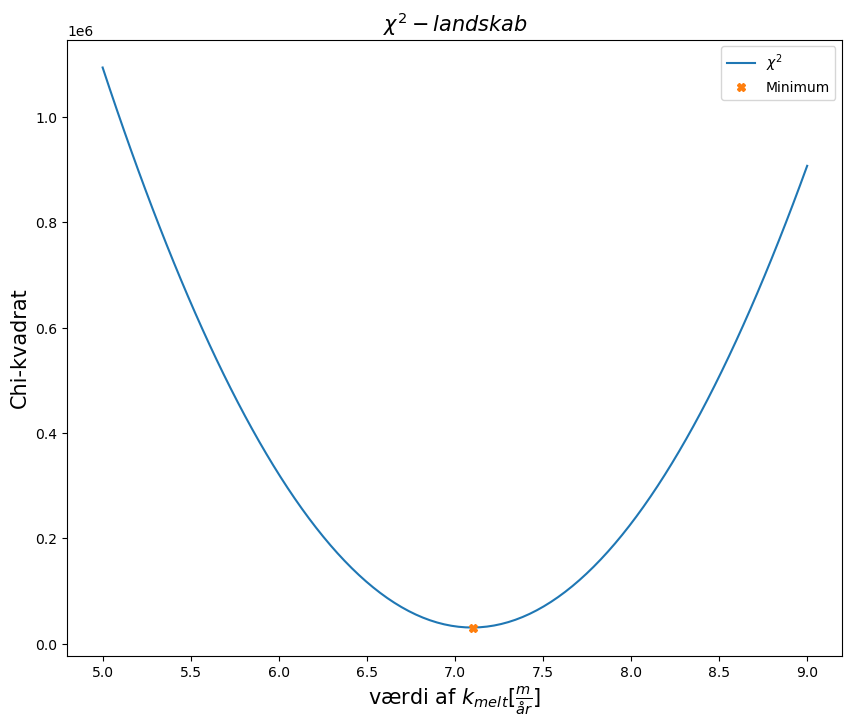

In [19]:
# Jeg kører funktionen
konstanter_list, chi_list, chi_red_list, optimal_k_melt_index  = optimering(5, 9, 100)

## __Plot af simulering med optimale værdi af k_melt__

Her køres simuleringen baglæns med den optimale k-værdi, og model sammenlignes med data i et plot.

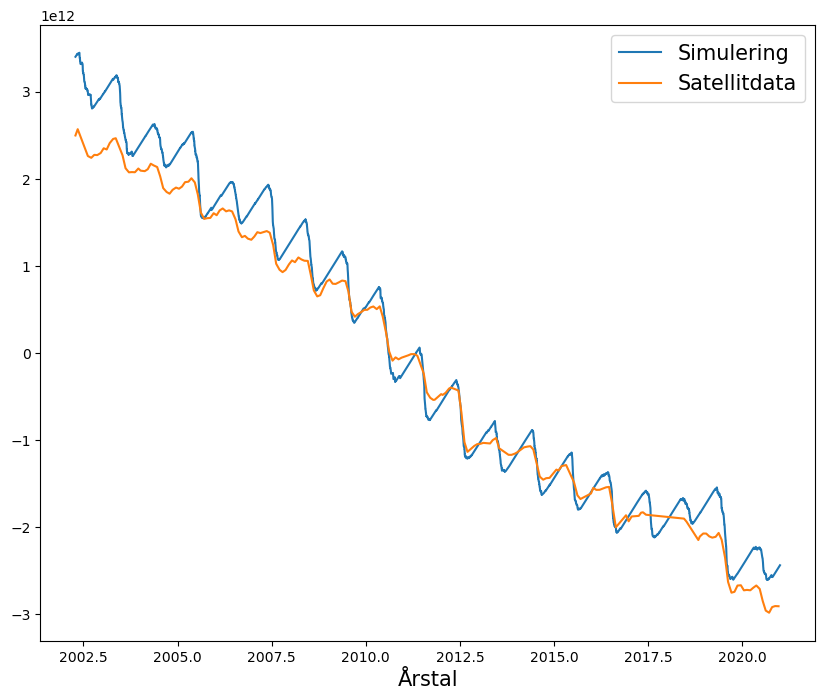

In [20]:
# De globale konstanter defineres
V_0 = 2.85 * 10**15
V = 2.85 * 10**15   # startvolumen af iskappe
h = 3 * 10**3       # Starthøjde af iskappe
R = 500 * 10**3     # Startradius af iskappe
T_f = 0        
alfa = - 9.8 * 10**(-3)  # konstant hvormed temperatur stiger per meter
k = h/np.sqrt(R)   # formfaktor for iskappe. Antages global konstant
dt = 1/(365.25 * 4)  # Tidsskridt (her 1/2 døgn) - omregnet til år

# Tuningskonstanter
k_melt = konstanter_list[optimal_k_melt_index]  
acc = akk_gns   # Nedbør pr år [m/år]. Antages konstant i perioden


# Der oprettes tomme lister til resultatet af simuleringen
V_list = []
V_melt_list = []
V_acc_list = []


for i in range(1, len(år) + 1):
    R = (3/16 * V/k)**(2/5)     # Ny radius af iskappe
    
    V_acc = k_acc * (acc * 8 * R**2) * dt  # Nedbøret dette tidsskridt
    
    if temp[-i] - T_f <= 0:
        V_melt = 0 
    elif temp[-i] - T_f > 0:
        V_melt = k_melt * 8/3 * R * (temp[-i] - T_f) * ((T_f - temp[-i])/(alfa * k))**2 * dt # ganger tidsskridt og M på
    V +=  - V_acc + V_melt
    
    V_list.append(V)
    V_melt_list.append(V_melt)
    V_acc_list.append(V_acc)

V_list.reverse()
dvol_sim = V_list - np.mean(V_list)
    
# Plot
    
plt.figure(figsize = (10,8))
plt.plot(år, dvol_sim, label = 'Simulering')
plt.xlabel('Årstal', fontsize = 15)## Udvælger 20 år (år 1955-1975) og bruger deres årstidscyklus på iskernedata

plt.plot(år_sat, dvol_sat_korr, label = 'Satellitdata')
plt.legend(fontsize = 15)

## Forskel på midt indlandsistemperatur og kysttemperatur

Forskellen er 5.5608806093626635


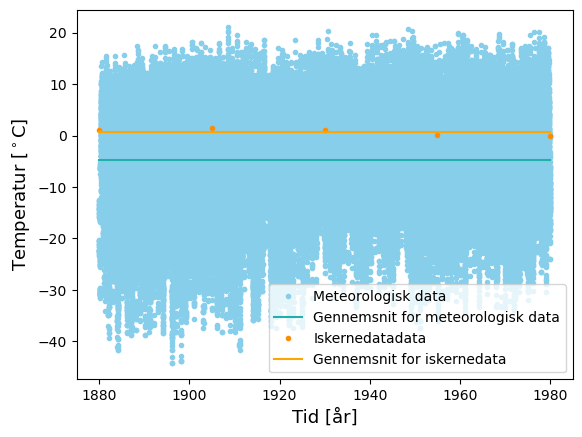

In [21]:
gns1 = np.average(temp20_rå[0:5])

top = 1980
bund = 1880
temp_X = temp_rå[(år_rå >= bund)&(år_rå < top)]

gns2 = np.average(temp_X)

forskel = np.absolute(gns1 - gns2)

plt.plot(np.linspace(1880,1980,len(temp_X)),temp_X, '.', c = 'skyblue', label = 'Meteorologisk data')
plt.plot(np.linspace(1880,1980,100), np.linspace(gns2,gns2,100), c = 'lightseagreen', label = 'Gennemsnit for meteorologisk data')

plt.plot(np.linspace(1880,1980,5),temp20_rå[0:5], '.', c = 'darkorange', label = 'Iskernedatadata')
plt.plot(np.linspace(1880,1980,100), np.linspace(gns1,gns1,100), c = 'orange', label = 'Gennemsnit for iskernedata')

plt.legend()
plt.xlabel('Tid [år]', fontsize = 13)
plt.ylabel(r'Temperatur [$^\circ$C]', fontsize = 13)

print("Forskellen er", forskel)

# Simulering af iskappevolumensudvikling gennem den sidste varmeperiode

## Udvælger 20 år (år 1955-1975) og bruger deres årstidscyklus på iskernedata

[0.00000e+00 1.40000e-03 2.70000e-03 ... 1.99959e+01 1.99973e+01
 1.99986e+01]


Text(0, 0.5, 'Temperaturafvigelse [$^\\circ$C]')

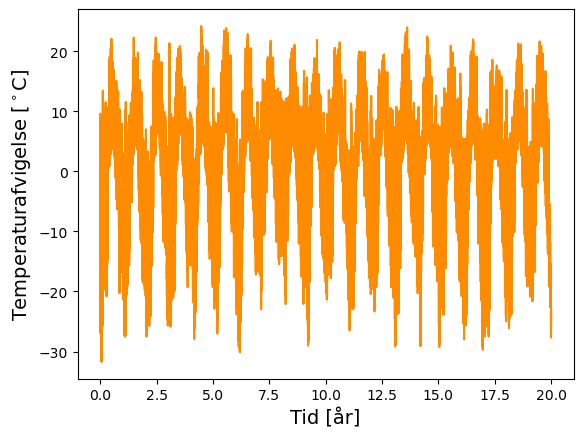

In [42]:
top = 1975
bund = 1955
maske = (år_rå >= bund)&(år_rå < top)

år_X = år_rå[maske]
år_X = år_X - min(år_X)
temp_X = temp_rå[maske]
temp_X_afv = temp_X-np.average(temp_X)

print(år_X)
plt.plot(år_X,temp_X_afv, c = 'darkorange')
plt.xlabel('Tid [år]', fontsize = 14)
plt.ylabel(r'Temperaturafvigelse [$^\circ$C]', fontsize = 14)

### Interpolation

29220.0


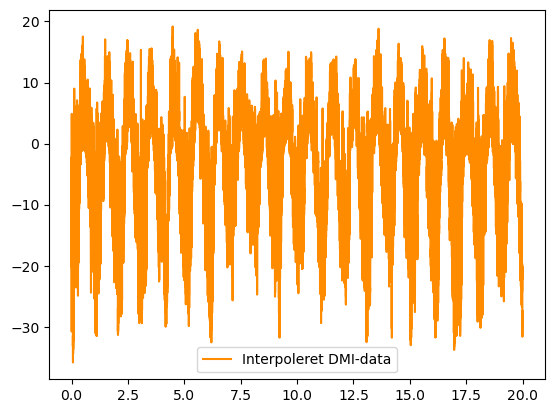

In [43]:
print(4*365.25*20)
year = np.linspace(min(år_X), max(år_X), 29220)
temp = np.interp(year, år_X, temp_X)

plt.plot(year,temp, c = 'darkorange', label = 'Interpoleret DMI-data')
plt.legend()

### Lægger årstidscyklus ind over iskernedata

In [73]:
år20_iter = år20_rå - år20_rå[0]

temp_array = np.array([])
år_array = np.array([])

for i, j in np.nditer([temp20_rå, år20_iter]):
    temp_c = i + temp - forskel #kysttemperatur
    år_c = j + year

    temp_array = np.append(temp_array, temp_c)
    år_array = np.append(år_array, år_c)

Text(0, 0.5, 'Temperatur [$^\\circ$C]')

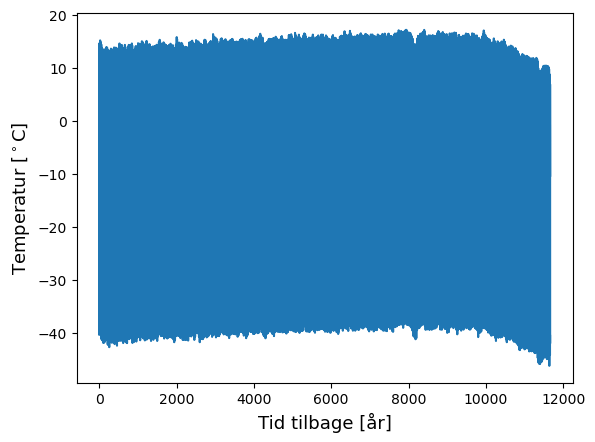

In [75]:
plt.plot(år_array, temp_array)
plt.xlabel('Tid tilbage [år]', fontsize = 13)
plt.ylabel(r'Temperatur [$^\circ$C]', fontsize = 13)

Text(0, 0.5, 'Temperatur [$^\\circ$C]')

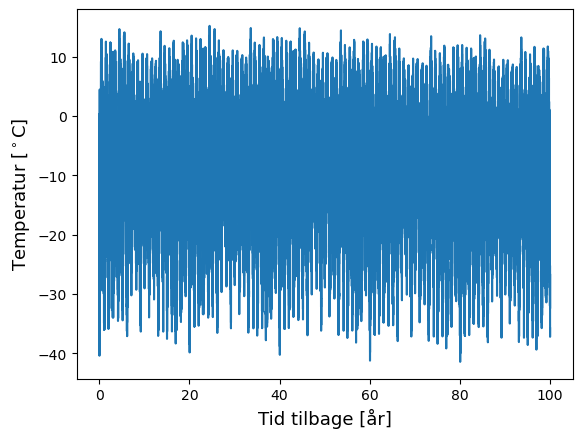

In [79]:
#betragter min lækre data
top = 100
bund = 0
maske = (år_array >= bund)&(år_array < top)

år_array_X = år_array[maske]
temp_array_X = temp_array[maske]

plt.plot(år_array_X, temp_array_X)
plt.xlabel('Tid tilbage [år]', fontsize = 13)
plt.ylabel(r'Temperatur [$^\circ$C]', fontsize = 13)

### Gennemsnitlig akkumulationsrate

In [93]:
print(np.absolute(2000-år20_rå[0]+20))
print(GRIP_age[-25])
print(NGRIP_age[-25])
print(år20_rå[-1])

1980.0
11679.0
11679.0
11680.0


In [52]:
print(GRIP_årstal[9:])
print(NGRIP_årstal[16:])

[ 1980.  1979.  1978. ... -9702. -9703. -9704.]
[ 1980.  1979.  1978. ... -9702. -9703. -9704.]


Fjerner de sidste 3 elementer i arrays for at de passer med data for 20 års gennemsnitlig temperatur samt fjerner nogle af de første elementer i arrays for at de begge starter fra år 1980:

In [94]:
GRIP_age2 = GRIP_age[9:-24]
NGRIP_age2 = NGRIP_age[16:-24]
GRIP_acc_rate2 = GRIP_acc_rate[9:-24]
NGRIP_acc_rate2 = NGRIP_acc_rate[16:-24]

In [95]:
print(GRIP_age2)
print(NGRIP_age2)

[   20.    21.    22. ... 11677. 11678. 11679.]
[   20.    21.    22. ... 11677. 11678. 11679.]


In [96]:
gns_acc_rate1 = (GRIP_acc_rate2 + NGRIP_acc_rate2)/2 #m is/år fra år 1980
gns_acc_rate = np.repeat(gns_acc_rate1, 365.25*4)*1/(365.25*4)

Længderne af følgende arrays skulle gerne være ens

In [97]:
print(len(gns_acc_rate))
print(len(temp_array))

17035260
17035260


In [98]:
# Før jeg lavede ekstra biksbaks, var der en forskel på 21 i enheder af år. print("forskel i enheder af år =",(len(gns_acc_rate)-len(temp_array))/(365.25*4))

# Simulation

In [100]:
V = 2.85 * 10**15        #m^3
H = 3 * 10**3            #m
R = 500 * 10**3          #m
T_f = 0                  #grader
alfa = - 9.8 * 10**(-3)  #temperaturændring pr. højdeforøgelse (deg C/m)
k = H/np.sqrt(R)         #formfaktor. Vi antager, at iskappens form ikke ændrer sig
dt = 1/(4*365.25)        #tidsskridt i år

#k_melt = 8.5 * 5 * 2 * 10**(-1)  #Smeltekonstant    
k_melt = konstanter_list[optimal_k_melt_index]              #m/år
k_acc = 2.2557             #Tuningskonstant for akkumulationen

V_list = []
V_melt_list = []         #For overbliks skyld
acc_list = []
R_list = []

N = 17000000

for i, j in np.nditer([temp_array[0:N], gns_acc_rate[0:N]]):
    
    R = (3/16 * V/k)**(2/5)  #Jeppes formel. Undersøges senere
    V_acc = k_acc * (j * 8 * R**2)*dt  #Volumen tilført pr tidsskridt.
    
    if i - T_f < 0:
        V_melt = 0
        
    elif i == 0:
        V_melt = 0
        
    elif i - T_f > 0:
        V_melt = dt*k_melt * 8/3 * R * (i - T_f) * ((T_f - i)/(alfa * k))**2 #Vi undersøger dette integrale senere #Tiføj ekstra getjerkonstant fra isbjergedannelse. + k_isbjerg
        #og r_f = R - ((T_f - temp[t])/(alfa * k))**2
       
    V += - V_acc + V_melt  #Omvendt fortegn for at gå tilbage i tid
    V_list.append(V)
    V_melt_list.append(V_melt)
    acc_list.append(V_acc)
    R_list.append(R)

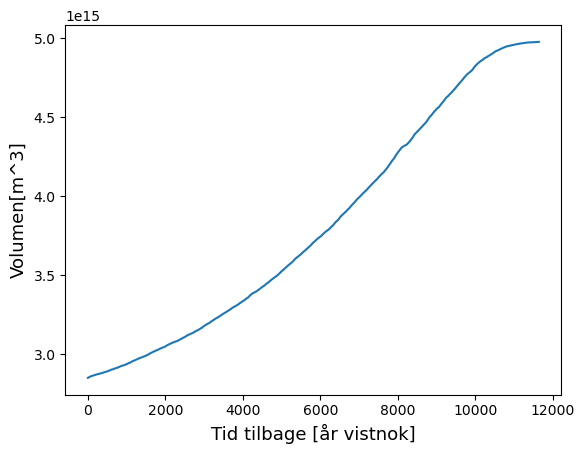

In [102]:
plt.plot(np.linspace(0, år_array[N], len(V_list)), V_list)
plt.xlabel('Tid tilbage [år vistnok]', fontsize = 13)
plt.ylabel('Volumen[m^3]', fontsize = 13)
plt.savefig('stolthønemor.png')

Text(0, 0.5, 'Smeltevolumen[m^3]')

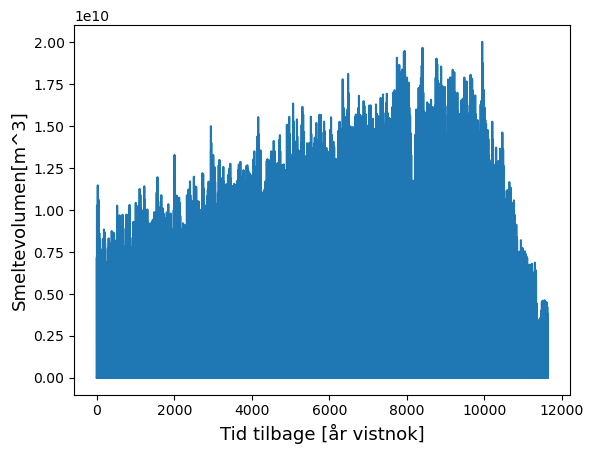

In [103]:
plt.plot(np.linspace(0, år_array[N], len(V_list)), V_melt_list)
plt.xlabel('Tid tilbage [år vistnok]', fontsize = 13)
plt.ylabel('Smeltevolumen[m^3]', fontsize = 13)

Text(0, 0.5, 'Akkumuleret volumen[m^3]')

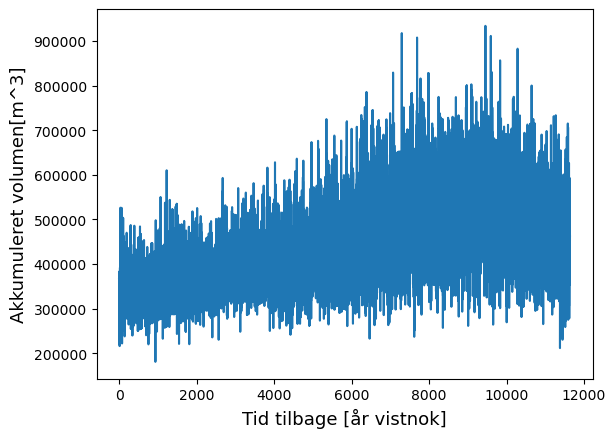

In [106]:
plt.plot(np.linspace(0, år_array[N], len(V_list)), acc_list)
plt.xlabel('Tid tilbage [år vistnok]', fontsize = 13)
plt.ylabel('Akkumuleret volumen[m^3]', fontsize = 13)

Text(0, 0.5, 'Radius[m]')

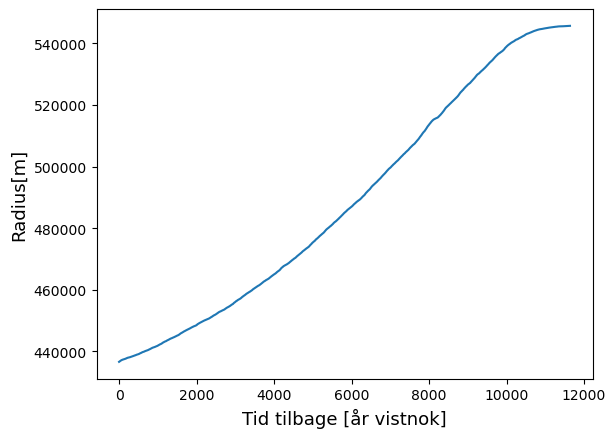

In [105]:
plt.plot(np.linspace(0, år_array[N], len(V_list)), R_list)
plt.xlabel('Tid tilbage [år vistnok]', fontsize = 13)
plt.ylabel('Radius[m]', fontsize = 13)

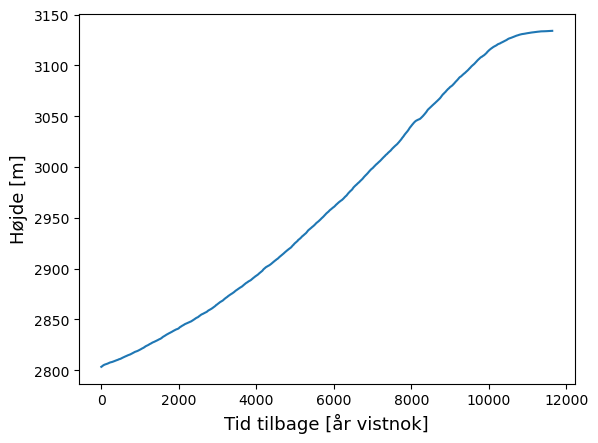

In [108]:
plt.plot(np.linspace(0, år_array[N], len(V_list)), k*np.sqrt(R_list))
plt.xlabel('Tid tilbage [år vistnok]', fontsize = 13)
plt.ylabel('Højde [m]', fontsize = 13)
plt.savefig('Højdeændring.png')